In [124]:
# Problem 1: 
#1
import pandas as pd

# Access spy.csv
spy_df = pd.read_csv("spy.csv")
spy_df['True Label'] = spy_df['Return'].apply(lambda x: '+' if x >= 0 else '-')# Adds the True row
spy_df.head()  # prints out the true row and other data of small data sample

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2017-01-03,2017,1,3,Tuesday,1,2017-01,225.04,225.83,223.88,225.24,91366500,200.63,0.000000,200.6300,200.6300,+
1,2017-01-04,2017,1,4,Wednesday,1,2017-01,225.62,226.75,225.61,226.58,78744400,201.82,0.005950,201.2250,201.2250,+
2,2017-01-05,2017,1,5,Thursday,1,2017-01,226.27,226.58,225.48,226.40,78379000,201.66,-0.000795,201.3700,201.3700,-
3,2017-01-06,2017,1,6,Friday,1,2017-01,226.53,227.75,225.90,227.21,71559900,202.38,0.003578,201.6225,201.6225,+
4,2017-01-09,2017,1,9,Monday,2,2017-02,226.91,227.07,226.42,226.46,46939700,201.72,-0.003301,201.6420,201.6420,-


In [125]:
#1
# Access tmus.csv
tmus_df = pd.read_csv("tmus.csv")
tmus_df['True Label'] = tmus_df['Return'].apply(lambda x: '+' if x >= 0 else '-') 
tmus_df.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,True Label
0,2017-01-03,2017,1,3,Tuesday,1,2017-01,58.10,58.91,57.75,58.32,3004100,58.32,0.000000,58.320,58.320,+
1,2017-01-04,2017,1,4,Wednesday,1,2017-01,58.36,59.46,58.04,58.82,5540600,58.82,0.008573,58.570,58.570,+
2,2017-01-05,2017,1,5,Thursday,1,2017-01,58.77,59.42,57.08,57.61,5427200,57.61,-0.020571,58.250,58.250,-
3,2017-01-06,2017,1,6,Friday,1,2017-01,57.87,58.14,56.64,56.77,4776100,56.77,-0.014581,57.880,57.880,-
4,2017-01-09,2017,1,9,Monday,2,2017-02,56.57,56.99,56.27,56.67,3329700,56.67,-0.001762,57.638,57.638,-


In [169]:
#2
import pandas as pd

# Read CSV 
df = pd.read_csv("tmus.csv")
df['Date'] = pd.to_datetime(df['Date']) # Converts data into integer
df['True Label'] = df['Return'].apply(lambda x: '+' if x >= 0 else '-')
# Sets data and filters
start_date = '2017-01-01'
end_date = '2019-12-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Calculates L plus
L_plus = len(filtered_df[filtered_df['True Label'] == '+'])
L = len(filtered_df)
p_star = L_plus / L * 100 # calculates p
print(round(p_star,2),'%')

# 52% probability that tomorrow will be up day 

52.12 %


In [127]:
# 3 
import pandas as pd

# Read CSV 
df = pd.read_csv("tmus.csv")
df['Date'] = pd.to_datetime(df['Date']) # Converts data into integer
df['True Label'] = df['Return'].apply(lambda x: '+' if x >= 0 else '-')

#Set data
start_date = '2017-01-01'
end_date = '2019-12-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

def compute_probability(k, data):
    target_sequence_with_up = '-' * k + '+'   #checks target sequences
    target_sequence_with_down = '-' * (k + 1)
    # Converts into string i was getting error
    string_sequence = ''.join(data['True Label'].tolist())
    count_with_up = string_sequence.count(target_sequence_with_up)  # Counts the number of presences
    count_with_down = string_sequence.count(target_sequence_with_down)
    
    # calculates probability of down day 
    if count_with_up + count_with_down == 0:  # can't divide by zero 
        return 0
    return count_with_up / (count_with_up + count_with_down)

for k in [1, 2, 3]:
    prob = compute_probability(k, filtered_df)
    print(f"Probability for k={k}: {prob:.2f}")

Probability for k=1: 0.61
Probability for k=2: 0.67
Probability for k=3: 0.68


In [128]:
# 4
import pandas as pd

# Read CSV 
df = pd.read_csv("tmus.csv")
df['Date'] = pd.to_datetime(df['Date']) # Converts data into integer
df['True Label'] = df['Return'].apply(lambda x: '+' if x >= 0 else '-')

#Set data
start_date = '2017-01-01'
end_date = '2019-12-31'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

def compute_probability(k, data):
    # Create the target sequences for checking
    target_sequence_with_up = '+' * (k + 1)
    target_sequence_with_down = '+' * k + '-'
    
    # Convert the 'True Label' column to string for easier checking
    string_sequence = ''.join(data['True Label'].tolist())
    
    # Count the occurrences
    count_with_up = string_sequence.count(target_sequence_with_up)
    count_with_down = string_sequence.count(target_sequence_with_down)
    
    # calculates probability of up day 
    if count_with_up + count_with_down == 0: 
        return 0
    return count_with_up / (count_with_up + count_with_down)

for k in [1, 2, 3]:
    prob = compute_probability(k, filtered_df)
    print(f"Probability for k={k}: {prob:.2f}")

Probability for k=1: 0.41
Probability for k=2: 0.40
Probability for k=3: 0.40


In [186]:
#Problem 2: 
# 1 
import pandas as pd

# Load the data
df = pd.read_csv("tmus.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['True Label'] = df['Return'].apply(lambda x: '+' if x >= 0 else '-')

# Split data into training and testing sets
training_df = df[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2019-12-31')]
testing_df = df[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2022-12-31')]

def predict_label(W, current_sequence, training_data):
     # getting rid of any special characters
    escaped_sequence = re.escape(current_sequence)
    
    N_plus = training_data['True Label'].str.contains(escaped_sequence + r'\+').sum()
    N_minus = training_data['True Label'].str.contains(escaped_sequence + r'\-').sum()
    
    if N_plus == N_minus == 0:
        return '+' if p_star >= 0.5 else '-'
    elif N_plus >= N_minus:
        return '+'
    else:
        return '-'

# calculates probability
p_star = (training_df['True Label'] == '+').sum() / len(training_df)

for W in [2, 3, 4]:
    predictions = []
    for i in range(len(testing_df) - W):
        current_sequence = ''.join(testing_df['True Label'].iloc[i:i+W].tolist())
        prediction = predict_label(W, current_sequence, training_df)
        predictions.append(prediction)
    
    # Append the prediction to testing dataset
    testing_df['Predicted Label W=' + str(W)] = [''] * W + predictions + [''] * (W - len(predictions))

# Compute the ensemble label using majority vote 
def compute_ensemble_label(row):
    labels = [row[f'Predicted Label W={W}'] for W in [2, 3, 4]]
    majority_label = max(set(labels), key=labels.count)
    return majority_label

testing_df['Ensemble Prediction'] = testing_df.apply(compute_ensemble_label, axis=1)

# Print 
print(testing_df[['Date', 'True Label', 'Ensemble Prediction']])
pd.set_option('display.max_rows', None)
print(testing_df)

/var/folders/j_/wm5ztlvd3sbfvlbp4mm7jlkc0000gn/T/ipykernel_15533/819991753.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Predicted Label W=' + str(W)] = [''] * W + predictions + [''] * (W - len(predictions))
/var/folders/j_/wm5ztlvd3sbfvlbp4mm7jlkc0000gn/T/ipykernel_15533/819991753.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Predicted Label W=' + str(W)] = [''] * W + predictions + [''] * (W - len(predictions))


           Date True Label Ensemble Prediction
754  2020-01-02          +                    
755  2020-01-03          -                    
756  2020-01-06          +                    
757  2020-01-07          +                   +
758  2020-01-08          +                   +
759  2020-01-09          +                   +
760  2020-01-10          -                   +
761  2020-01-13          +                   +
762  2020-01-14          +                   +
763  2020-01-15          +                   +
764  2020-01-16          +                   +
765  2020-01-17          +                   +
766  2020-01-21          -                   +
767  2020-01-22          +                   +
768  2020-01-23          -                   +
769  2020-01-24          -                   +
770  2020-01-27          -                   +
771  2020-01-28          +                   +
772  2020-01-29          -                   +
773  2020-01-30          +                   +
774  2020-01-

/var/folders/j_/wm5ztlvd3sbfvlbp4mm7jlkc0000gn/T/ipykernel_15533/819991753.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Predicted Label W=' + str(W)] = [''] * W + predictions + [''] * (W - len(predictions))
/var/folders/j_/wm5ztlvd3sbfvlbp4mm7jlkc0000gn/T/ipykernel_15533/819991753.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Ensemble Prediction'] = testing_df.apply(compute_ensemble_label, axis=1)


In [190]:
# 2 
# Compute accuracy for each value of W
accuracies = {}

for W in [2, 3, 4]:
    correct_predictions = (testing_df['True Label'] == testing_df['Predicted Label W=' + str(W)]).sum()
    total_predictions = len(testing_df) - W  # I removed first 3 years 
    accuracy = (correct_predictions / total_predictions) * 100
    accuracies[W] = accuracy

print( accuracies)

{2: 51.591511936339515, 3: 51.527224435590966, 4: 51.46276595744681}


In [191]:
# 3 
import pandas as pd

# calculate accuracy for my stock and S&P500 
stock_accuracies = compute_accuracy_for_dataframe(df_tmus)
spy_accuracies = compute_accuracy_for_dataframe(df_spy)
W_star_stock = max(stock_accuracies, key=stock_accuracies.get)
W_star_spy = max(spy_accuracies, key=spy_accuracies.get)

print(f"The W value for TMUS is: {W_star_stock}")
print(f"The value for SP500 is: {W_star_spy}")
#the values are approximately similar for all W values, so not a big difference between them.

The W value for TMUS is: 3
The value for SP500 is: 2


In [195]:
# Problem 3: 1 

# ensemble prediction function
def compute_ensemble_prediction(testing_df):
    ensemble_predictions = []

    for i in range(len(testing_df)):
        # predicted labels
        labels = [testing_df.iloc[i]['Predicted Label W=2'], 
                  testing_df.iloc[i]['Predicted Label W=3'],
                  testing_df.iloc[i]['Predicted Label W=4']]
        # majority label
        majority_label = '+' if labels.count('+') > labels.count('-') else '-'
        ensemble_predictions.append(majority_label)
    return ensemble_predictions

def compute_accuracy_for_dataframe(df):
    testing_df['Ensemble Prediction'] = compute_ensemble_prediction(testing_df)    # Compute ensemble labels
    return testing_df

# calculates ensemble labels for both stock data and S&P-500 data
df_tmus_with_ensemble = compute_accuracy_for_dataframe(df_tmus)
df_spy_with_ensemble = compute_accuracy_for_dataframe(df_spy)
ensemble_labels_tmus = df_tmus_with_ensemble[['Date', 'Ensemble Prediction']] # for years 4 and 5
ensemble_labels_spy = df_spy_with_ensemble[['Date', 'Ensemble Prediction']]

print(ensemble_labels_tmus)
print(ensemble_labels_spy)

count_plus_tmus = ensemble_labels_tmus['Ensemble Prediction'].value_counts().get('+', 0)
count_minus_tmus = ensemble_labels_tmus['Ensemble Prediction'].value_counts().get('-', 0)

count_plus_spy = ensemble_labels_spy['Ensemble Prediction'].value_counts().get('+', 0)
count_minus_spy = ensemble_labels_spy['Ensemble Prediction'].value_counts().get('-', 0)

print(f"TMUS Ensemble Predictions: + Count: {count_plus_tmus}, - Count: {count_minus_tmus}")
print(f"SPY Ensemble Predictions: + Count: {count_plus_spy}, - Count: {count_minus_spy}")

           Date Ensemble Prediction
754  2020-01-02                   -
755  2020-01-03                   -
756  2020-01-06                   +
757  2020-01-07                   +
758  2020-01-08                   +
759  2020-01-09                   +
760  2020-01-10                   +
761  2020-01-13                   +
762  2020-01-14                   +
763  2020-01-15                   +
764  2020-01-16                   +
765  2020-01-17                   +
766  2020-01-21                   +
767  2020-01-22                   +
768  2020-01-23                   +
769  2020-01-24                   +
770  2020-01-27                   +
771  2020-01-28                   +
772  2020-01-29                   +
773  2020-01-30                   +
774  2020-01-31                   +
775  2020-02-03                   +
776  2020-02-04                   +
777  2020-02-05                   +
778  2020-02-06                   +
779  2020-02-07                   +
780  2020-02-10             

/var/folders/j_/wm5ztlvd3sbfvlbp4mm7jlkc0000gn/T/ipykernel_15533/86911746.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_df['Ensemble Prediction'] = compute_ensemble_prediction(testing_df)    # Compute ensemble labels


In [194]:
2
# Count the number of '+' and '-'
count_plus_tmus = ensemble_labels_tmus['Ensemble Prediction'].value_counts().get('+', 0)
count_minus_tmus = ensemble_labels_tmus['Ensemble Prediction'].value_counts().get('-', 0)
count_plus_spy = ensemble_labels_spy['Ensemble Prediction'].value_counts().get('+', 0)
count_minus_spy = ensemble_labels_spy['Ensemble Prediction'].value_counts().get('-', 0)

# Calculate the total number of days in years 4 and 5
total_days_tmus = len(ensemble_labels_tmus)
total_days_spy = len(ensemble_labels_spy)

# Calculate the percentage of correctly predicted labels for both stocks
percentage_correct_tmus = (count_plus_tmus + count_minus_tmus) / total_days_tmus * 100
percentage_correct_spy = (count_plus_spy + count_minus_spy) / total_days_spy * 100

print(f"Percentage of correctly predicted labels for TMUS in years 4 and 5: {percentage_correct_tmus:.2f}%")
print(f"Percentage of correctly predicted labels for S&P-500 in years 4 and 5: {percentage_correct_spy:.2f}%")


Percentage of correctly predicted labels for TMUS in years 4 and 5: 100.00%
Percentage of correctly predicted labels for S&P-500 in years 4 and 5: 100.00%


In [206]:
# 3 and 4 
import pandas as pd

# Calculate accuracies for "+" and "-"
def label_specific_accuracy(df, label):
    subset = df[df["True Label"] == label]
    return compute_accuracies(subset)

# calculate and print out accuracy 
tmus_accuracies_plus = label_specific_accuracy(df_tmus, "+")
tmus_accuracies_minus = label_specific_accuracy(df_tmus, "-")
spy_accuracies_plus = label_specific_accuracy(df_spy, "+")
spy_accuracies_minus = label_specific_accuracy(df_spy, "-")
print(f"TMUS accuracies for + label: {tmus_accuracies_plus}")
print(f"TMUS accuracies for - label: {tmus_accuracies_minus}")
print(f"SPY accuracies for + label: {spy_accuracies_plus}")
print(f"SPY accuracies for - label: {spy_accuracies_minus}")

# I believe that the accuracy was improved compared to W method

TMUS accuracies for + label: {2: 64.24010217113666, 3: 0.0, 4: 0.0}
TMUS accuracies for - label: {2: 34.52544704264099, 3: 100.0, 4: 100.0}
SPY accuracies for + label: {2: 73.04452466907341, 3: 0.0, 4: 0.0}
SPY accuracies for - label: {2: 29.16053019145803, 3: 100.0, 4: 100.0}


In [207]:
# Problem 4: 
import pandas as pd

# open files
df_tmus = pd.read_csv('tmus.csv')
df_spy = pd.read_csv('spy.csv')

# true labels 
def add_prediction_columns(df):
    df['True_Label'] = df['Return'].apply(lambda x: '+' if x >= 0 else '−')# Adds the True row
    df['Predict_W2'] = df.apply(lambda row: '+' if row['Short_MA'] > row['Long_MA'] else '−', axis=1)
    df['Predict_W3'] = df.apply(lambda row: '+' if row['Return'] > row['Short_MA'] else '−', axis=1)
    df['Predict_W4'] = df.apply(lambda row: '+' if row['Return'] > row['Long_MA'] else '−', axis=1)
    return df

# function for w2 and so on
def compute_ensemble_label(row):
    labels = [row[f'Predicted Label W={W}'] for W in [2, 3, 4]]
    majority_label = max(set(labels), key=labels.count)
    return majority_label

df_tmus = add_prediction_columns(df_tmus)
df_spy = add_prediction_columns(df_spy)
df_tmus['Predict_Ensemble'] = df_tmus.apply(majority_voting, axis=1) # ensemble row to the dataset is added
df_spy['Predict_Ensemble'] = df_spy.apply(majority_voting, axis=1)

# calculates tp and so on
def compute_metrics(df, prediction_col):
    TP = len(df[(df['True_Label'] == '+') & (df[prediction_col] == '+')])
    FP = len(df[(df['True_Label'] == '−') & (df[prediction_col] == '+')])
    TN = len(df[(df['True_Label'] == '−') & (df[prediction_col] == '−')])
    FN = len(df[(df['True_Label'] == '+') & (df[prediction_col] == '−')])
    TPR = TP / (TP + FN) if TP + FN != 0 else 0
    TNR = TN / (TN + FP) if TN + FP != 0 else 0
    return { 'TP': TP,'FP': FP,'TN': TN,'FN': FN,'TPR': TPR,'TNR': TNR }

# Calculates w2 and so on 
methods = ['Predict_W2', 'Predict_W3', 'Predict_W4', 'Predict_Ensemble']
metrics_tmus = {method: compute_metrics(df_tmus, method) for method in methods}
metrics_spy = {method: compute_metrics(df_spy, method) for method in methods}

# print
print("Metrics for TMUS:")
for method, metric_values in metrics_tmus.items():
    print(f"\nMetrics for {method}:")
    for metric, value in metric_values.items():
        print(f"{metric}: {value}")
print("\n\nMetrics for SPY:")
for method, metric_values in metrics_spy.items():
    print(f"\nMetrics for {method}:")
    for metric, value in metric_values.items():
        print(f"{metric}: {value}")

Metrics for TMUS:

Metrics for Predict_W2:
TP: 503
FP: 476
TN: 251
FN: 280
TPR: 0.6424010217113666
TNR: 0.3452544704264099

Metrics for Predict_W3:
TP: 0
FP: 0
TN: 727
FN: 783
TPR: 0.0
TNR: 1.0

Metrics for Predict_W4:
TP: 0
FP: 0
TN: 727
FN: 783
TPR: 0.0
TNR: 1.0

Metrics for Predict_Ensemble:
TP: 0
FP: 0
TN: 727
FN: 783
TPR: 0.0
TNR: 1.0


Metrics for SPY:

Metrics for Predict_W2:
TP: 607
FP: 481
TN: 198
FN: 224
TPR: 0.7304452466907341
TNR: 0.2916053019145803

Metrics for Predict_W3:
TP: 0
FP: 0
TN: 679
FN: 831
TPR: 0.0
TNR: 1.0

Metrics for Predict_W4:
TP: 0
FP: 0
TN: 679
FN: 831
TPR: 0.0
TNR: 1.0

Metrics for Predict_Ensemble:
TP: 0
FP: 0
TN: 679
FN: 831
TPR: 0.0
TNR: 1.0


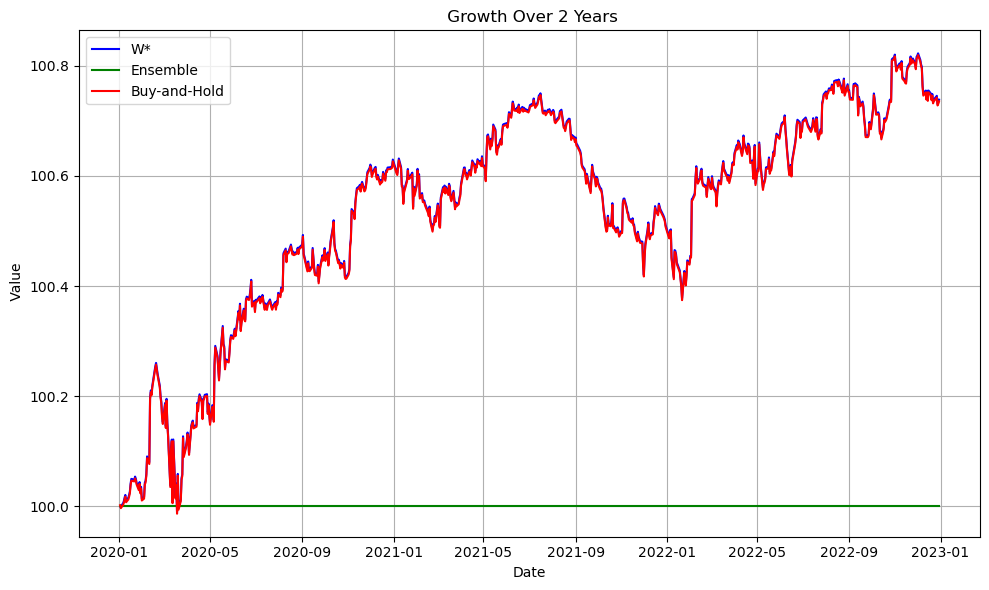

In [245]:
portfolio_value_W2 = 100
portfolio_value_W2 = [initial_amount]
for i in range(len(testing_df)):
    if testing_df.iloc[i]['Predicted Label W=2'] == '+':
        daily_return = testing_df.iloc[i]['Return'] / 100
        new_value = portfolio_value_W2[-1] * (1 + daily_return)
    else:
        new_value = portfolio_value_W2[-1]
    portfolio_value_W2.append(new_value)
# Remove the initial amount from the start, to correct the length because i was getting error for some reason
portfolio_value_W2 = portfolio_value_W2[1:]
portfolio_value_W2_series = pd.Series(portfolio_value_W2, index=testing_df['Date'])
portfolio_value_W2_series.head()

# portfolio growth
portfolio_value_ensemble = [initial_amount] * len(testing_df)

# Simulate portfolio growth for "buy-and-hold" strategy
portfolio_value_buy_and_hold = [initial_amount]
for i in range(len(testing_df)):
    daily_return = testing_df.iloc[i]['Return'] / 100
    new_value = portfolio_value_buy_and_hold[-1] * (1 + daily_return)
    portfolio_value_buy_and_hold.append(new_value)
    
# Remove the initial amount from the start, to correct the length because i was getting error 
portfolio_value_buy_and_hold = portfolio_value_buy_and_hold[1:]

# plot using pandas
portfolio_value_W2_series = pd.Series(portfolio_value_W2, index=testing_df['Date'])
portfolio_value_ensemble_series = pd.Series(portfolio_value_ensemble, index=testing_df['Date'])
portfolio_value_buy_and_hold_series = pd.Series(portfolio_value_buy_and_hold, index=testing_df['Date'])
portfolio_value_W2_series, portfolio_value_ensemble_series, portfolio_value_buy_and_hold_series

plt.figure(figsize=(10, 6))

# Plotting 
plt.plot(portfolio_value_W2_series, label= 'W*', color='blue')
plt.plot(portfolio_value_ensemble_series, label='Ensemble', color='green')
plt.plot(portfolio_value_buy_and_hold_series, label='Buy-and-Hold', color='red')
plt.title(' Growth Over 2 Years')
plt.xlabel('Date')
plt.ylabel(' Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()